In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. \
import matplotlib.pyplot as plt
import time 

TRAIN_DIR ='./PlantVillage'#path of dataset
IMG_SIZE =128
input_shape=(IMG_SIZE,IMG_SIZE,3)

In [2]:
def labelImg(x):
    return {
        'Pepper__bell___Bacterial_spot': 0,
        'Pepper__bell___healthy': 1,
        'Potato___Early_blight': 2,
        'Potato___healthy': 3,
        'Potato___Late_blight': 4,
        'Tomato__Target_Spot': 5,
        'Tomato__Tomato_mosaic_virus': 6,
        'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
        'Tomato_Bacterial_spot': 8,
        'Tomato_Early_blight': 9,
        'Tomato_healthy': 10,
        'Tomato_Late_blight': 11,
        'Tomato_Leaf_Mold': 12,
        'Tomato_Septoria_leaf_spot': 13,
        'Tomato_Spider_mites_Two_spotted_spider_mite': 14
    }[x]
def createDataset():
    trainingData = []
    for folder in os.listdir(TRAIN_DIR):
        # i=0
        for img in os.listdir(TRAIN_DIR + "/" + folder):
            # i+=1
            path = os.path.join(TRAIN_DIR + "/" + folder, img)
            try:
                label = labelImg(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                trainingData.append([np.array(img),np.array(label)])
            except:
                print(path)
            # if i==500:
            #     break
    shuffle(trainingData)
    return trainingData
dataset = createDataset()

./PlantVillage/PlantVillage\Pepper__bell___Bacterial_spot
./PlantVillage/PlantVillage\Pepper__bell___healthy
./PlantVillage/PlantVillage\Potato___Early_blight
./PlantVillage/PlantVillage\Potato___healthy
./PlantVillage/PlantVillage\Potato___Late_blight
./PlantVillage/PlantVillage\Tomato_Bacterial_spot
./PlantVillage/PlantVillage\Tomato_Early_blight
./PlantVillage/PlantVillage\Tomato_healthy
./PlantVillage/PlantVillage\Tomato_Late_blight
./PlantVillage/PlantVillage\Tomato_Leaf_Mold
./PlantVillage/PlantVillage\Tomato_Septoria_leaf_spot
./PlantVillage/PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite
./PlantVillage/PlantVillage\Tomato__Target_Spot
./PlantVillage/PlantVillage\Tomato__Tomato_mosaic_virus
./PlantVillage/PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus
./PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus\svn-r6Yb5c


In [3]:
os.listdir('./PlantVillage/')

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'PlantVillage',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [4]:
dataset_y=np.array([i[1] for i in dataset])
dataset_x=np.array([i[0] for i in dataset]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

dataset_x.shape

(20633, 128, 128, 3)

In [5]:
dataset_x=dataset_x/255
x_train,x_valid,y_train,y_valid=train_test_split(dataset_x,dataset_y,test_size=0.2)

In [6]:
x_train.shape

(16506, 128, 128, 3)

In [7]:
datasetgen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
dataset_generator = datasetgen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_valid, y_valid, batch_size=20)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        244       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [13]:
print('Our Keras Sequential model has %d layers' %len(model.layers))

Our Keras Sequential model has 18 layers


In [9]:
custom = model.fit_generator(dataset_generator, epochs=50, validation_data=val_generator, verbose=1)

C:\Users\GHOST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/50
516/516 [==============================] - 448s 865ms/step - loss: 1.7334 - accuracy: 0.4389 - val_loss: 1.4548 - val_accuracy: 0.5231
Epoch 2/50
516/516 [==============================] - 439s 850ms/step - loss: 1.0231 - accuracy: 0.6561 - val_loss: 0.7103 - val_accuracy: 0.7572
Epoch 3/50
516/516 [==============================] - 436s 845ms/step - loss: 0.8045 - accuracy: 0.7263 - val_loss: 0.8113 - val_accuracy: 0.7293
Epoch 4/50
516/516 [==============================] - 434s 841ms/step - loss: 0.6850 - accuracy: 0.7641 - val_loss: 0.6376 - val_accuracy: 0.7841
Epoch 5/50
516/516 [==========

In [23]:
dataset_x[100].shape

(128, 128, 3)

In [24]:
from tensorflow.keras.preprocessing import image
test=dataset_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,IMG_SIZE,IMG_SIZE,3))
test.shape
predictions = model.predict(test)
predictions

array([[1.30843736e-08, 9.96040923e-13, 7.61887775e-11, 5.16899103e-16,
        7.02526126e-09, 5.05797126e-10, 7.31121214e-19, 1.01125656e-10,
        9.99996901e-01, 3.12289103e-06, 2.86282974e-14, 9.60811465e-12,
        2.55971633e-11, 1.69614971e-08, 2.10432258e-13]], dtype=float32)

In [14]:
model.save("./Model")

INFO:tensorflow:Assets written to: ./Model\assets


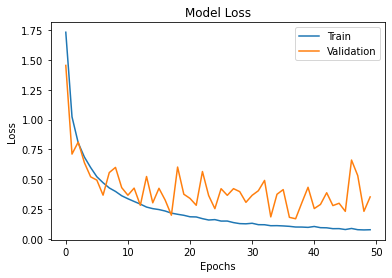

In [15]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

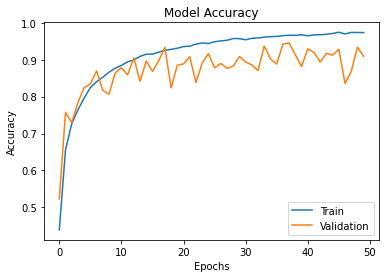

In [16]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()